<a href="https://colab.research.google.com/github/nissimlab/scRNA-seq-fixed-pancreas/blob/main/figures_plotting/ADMI_scoring/GSE99774_CIP_Bulk_ADMI_scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ADM index scoring using scanpy's "score genes" code modified for bulk
# GSE99774

#link Gdrive

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


# Installing pakages on Colab

In [2]:
!pip install numpy==1.22.4 pandas==1.5.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!sudo apt-get install -y libharfbuzz-dev libharfbuzz-dev libfribidi-dev libcairo2-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  gir1.2-harfbuzz-0.0 libblkid-dev libblkid1 libcairo-script-interpreter2
  libffi-dev libglib2.0-dev libglib2.0-dev-bin libgraphite2-dev
  libharfbuzz-gobject0 libharfbuzz-icu0 liblzo2-2 libmount-dev libmount1
  libpixman-1-dev libselinux1-dev libsepol1-dev libxcb-render0-dev
  libxcb-shm0-dev
Suggested packages:
  libcairo2-doc libgirepository1.0-dev libglib2.0-doc libgdk-pixbuf2.0-bin
  | libgdk-pixbuf2.0-dev libxml2-utils libgraphite2-utils
The following NEW packages will be installed:
  gir1.2-harfbuzz-0.0 libblkid-dev libcairo-script-interpreter2 libcairo2-dev
  libffi-dev libfribidi-dev libglib2.0-dev libglib2.0-dev-bin libgraphite2-dev
  libharfbuzz-dev libharfbuzz-gobject0 libharfbuzz-icu0 liblzo2-2 libmount-dev
  libpixman-1-dev libselinux1-dev libsepol1-dev libxcb-render0-dev
  libxcb-shm0-dev
The following packages will be upgr

In [4]:
!sudo apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages [1,012 kB]
Hit:4 http://archive.ubuntu.com/ubuntu focal InRelease
Get:5 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:10 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [1,060 kB]
Get:11 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:12 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3,260 kB]
Hit:13 http://ppa.launchpad.net/graphics-drivers

In [5]:
!sudo apt-get install msttcorefonts -qq

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 17.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libmspack0:amd64.
(Reading database ... 122541 files and directories currently installed.)
Preparing to unpack .../00-libmspack0_0.10.1-2_amd64.deb ...
Unpacking libmspack0:amd64 (0.10.1-2) ...
Selecting previously unselected package cabextract.
Preparing to unpack .../01-cabextract_1.9-3_amd64.deb ...
Unpacking cabextract (1.9-3) ...
Selecting previously unselected package libfontenc1:amd64.
Preparing to unpack .../02-libfontenc1_1%3a1.1.4-0ubuntu1_amd64.deb ...
Unpacking libfontenc1:amd64 (1:1.1.4-0ubun

In [6]:
!sudo apt install font-manager

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  font-manager-common font-viewer
Suggested packages:
  file-roller nautilus-font-manager nemo-font-manager yelp
The following NEW packages will be installed:
  font-manager font-manager-common font-viewer
0 upgraded, 3 newly installed, 0 to remove and 56 not upgraded.
Need to get 1,740 kB of archives.
After this operation, 9,394 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 font-manager-common amd64 0.7.7-0.3 [1,545 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 font-viewer amd64 0.7.7-0.3 [27.9 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 font-manager amd64 0.7.7-0.3 [168 kB]
Fetched 1,740 kB in 2s (803 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be 

In [7]:
!pip install matplotlib==3.5.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 78.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


#Load font

In [8]:
!rm ~/.cache/matplotlib -rf

In [1]:
import matplotlib.font_manager as fm

In [2]:
print(fm.findfont('Arial'))

/usr/share/fonts/truetype/msttcorefonts/Arial.ttf


In [3]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Bulk score ADM

In [ ]:
raw_counts = pd.read_csv('/content/drive/MyDrive/OtherPublishedCIP/Boggs_2018_bulk/Boggs_bulk_all_merged.csv', index_col=0)
raw_counts.head()

,mouse001_BL_F,mouse002_BL_F,mouse003_BL_F,mouse004_BL_F,mouse005_BL_M,mouse006_BL_M,mouse007_BL_M,mouse008_BL_M,mouse009_d7_F,mouse010_d7_F,...,mouse014_d7_M,mouse015_d7_M,mouse016_d7_M,mouse017_d14_F,mouse018_d14_F,mouse019_d14_F,mouse021_d14_M,mouse022_d14_M,mouse023_d14_M,mouse024_d14_M
gene_name,,,,,,,,,,,,,,,,,,,,,
Xkr4,6,1,1,3,4,4,5,1,5,6,...,2,2,2,6,2,5,5,1,0,2
Rp1,0,0,2,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sox17,8,9,9,8,8,3,8,4,2,6,...,15,3,10,11,12,7,10,11,7,9
Mrpl15,140,123,146,132,126,125,144,130,210,234,...,252,217,207,181,203,201,188,169,197,210
Lypla1,264,303,321,361,276,346,303,279,436,503,...,495,450,421,369,444,406,390,394,389,457


In [ ]:
def bulk_score_ADM(
    bulk_data):

    # Normalize data: cpm --> log (base 2)+1 normalization
    bulk_data=bulk_data.applymap(pd.to_numeric)
    cpm_data = (+bulk_data/ np.sum(+bulk_data, axis=0)) * 1e6
    log_data = np.log2(cpm_data + 1)

    # Define ADMI gene list
    gene_list={
    'Prss3','Gm2663', '1810009J06Rik', 'Gm5771', 'Prss1','Gm4744','Gm10334',
    'Reg2', 'Reg3b', 'Reg3g','Reg3a',
    'Krt18','Krt8', 'Krt19', 'Clu',
    'Tspan1','Cldn4'}

    np.random.seed(0)

    # Determine which gene_list variables are present in input data
    gene_list_in_data = []
    genes_to_ignore = []
    for gene in gene_list:
        if gene in log_data.index:
            gene_list_in_data.append(gene)
        else:
            genes_to_ignore.append(gene)
    if len(genes_to_ignore) > 0:
        print(f'Warning: genes are not in data and ignored: {genes_to_ignore}')
    gene_list = set(gene_list_in_data[:])

    if len(gene_list) == 0:
        raise ValueError("No valid genes were passed for scoring.")

    # # Extract geen names
    # gene_pool = log_data.index.tolist()

    n_bins = 25

    # Seurat approach in scoring cells -- compare genes against random genes in a matched interval of expression.
    obs_avg = pd.Series(np.nanmean(log_data, axis=1), index=log_data.index) # matrix with average expression of genes across all samples
    n_items = int(np.round(len(obs_avg) / (n_bins - 1))) # number of items in each bin
    obs_cut = obs_avg.rank(method='min') // n_items # makes a pandas series denoting which bin each gene belongs to
    control_genes = set()

    # takes control_genes from each unique expression interval
    for cut in np.unique(obs_cut.loc[list(gene_list)]):
        r_genes = np.array(obs_cut[obs_cut == cut].index)
        np.random.shuffle(r_genes)
        ctrl_size = len(r_genes)
        control_genes.update(set(r_genes[:ctrl_size]))

    # Final gene lists
    control_genes = list(control_genes - gene_list)
    gene_list = list(gene_list)

    # Extract the expression values for the genes of interest
    X_list = log_data.loc[gene_list].values
    X_list = np.nanmean(X_list, axis=0, dtype='float64')

    # Extract the expression values for the control genes
    X_control = log_data.loc[control_genes].values
    X_control = np.nanmean(X_control, axis=0, dtype='float64')

    score = X_list - X_control

    # Create a new DataFrame with the column names of bulk_data as row names and the corresponding values from score as the only column
    score_df = pd.DataFrame(data=score, index=log_data.columns, columns=["scores"])
    return(score_df)

In [ ]:
df=bulk_score_ADM(raw_counts)

## plot

In [ ]:
df = df.reset_index(drop=False)

In [ ]:
# Reset the index and set the original index as a new column
df = df.reset_index(drop=False)
df = df.rename(columns={'index': 'Donor'})


In [ ]:
metadata = pd.read_csv('/content/drive/MyDrive/OtherPublishedCIP/Boggs_2018_bulk/Boggs_bulk_metadata.csv', index_col=0)

In [ ]:
metadata

,Donor,Timepoint,Sex
Sample,,,
Boggs,mouse001_BL_F,control,F
Boggs,mouse002_BL_F,control,F
Boggs,mouse003_BL_F,control,F
Boggs,mouse004_BL_F,control,F
Boggs,mouse005_BL_M,control,M
Boggs,mouse006_BL_M,control,M
Boggs,mouse007_BL_M,control,M
Boggs,mouse008_BL_M,control,M
Boggs,mouse009_d7_F,d7,F


In [ ]:
metadata.set_index(metadata.columns[0], inplace=True)

In [ ]:
#Merge data on "sample names"
metadata = pd.DataFrame(metadata)

# merge dataframes on "donor" column
merged_df = pd.merge(metadata, df, on='Donor', how='outer')

In [ ]:
merged_df

,Donor,Timepoint,Sex,level_0,scores
0,mouse001_BL_F,control,F,0,0.690892
1,mouse002_BL_F,control,F,1,1.110579
2,mouse003_BL_F,control,F,2,0.301931
3,mouse004_BL_F,control,F,3,0.167281
4,mouse005_BL_M,control,M,4,-0.482989
5,mouse006_BL_M,control,M,5,-0.482474
6,mouse007_BL_M,control,M,6,-0.496985
7,mouse008_BL_M,control,M,7,-0.342288
8,mouse009_d7_F,d7,F,8,1.887643
9,mouse010_d7_F,d7,F,9,1.633097


In [ ]:
# specify the order of the categories
merged_df['Timepoint'] = pd.Categorical(merged_df['Timepoint'], categories=['control', 'd7', 'd14'], ordered=True)


#plotting

In [ ]:
plt.rcParams['figure.dpi']=200

In [ ]:
# define a dictionary to map old names to new names
mapping = {'control': 'Control', 'd7': '7day','d14': '14day'}

# use the replace method to rename categories
merged_df['Timepoint'] = merged_df['Timepoint'].replace(mapping)


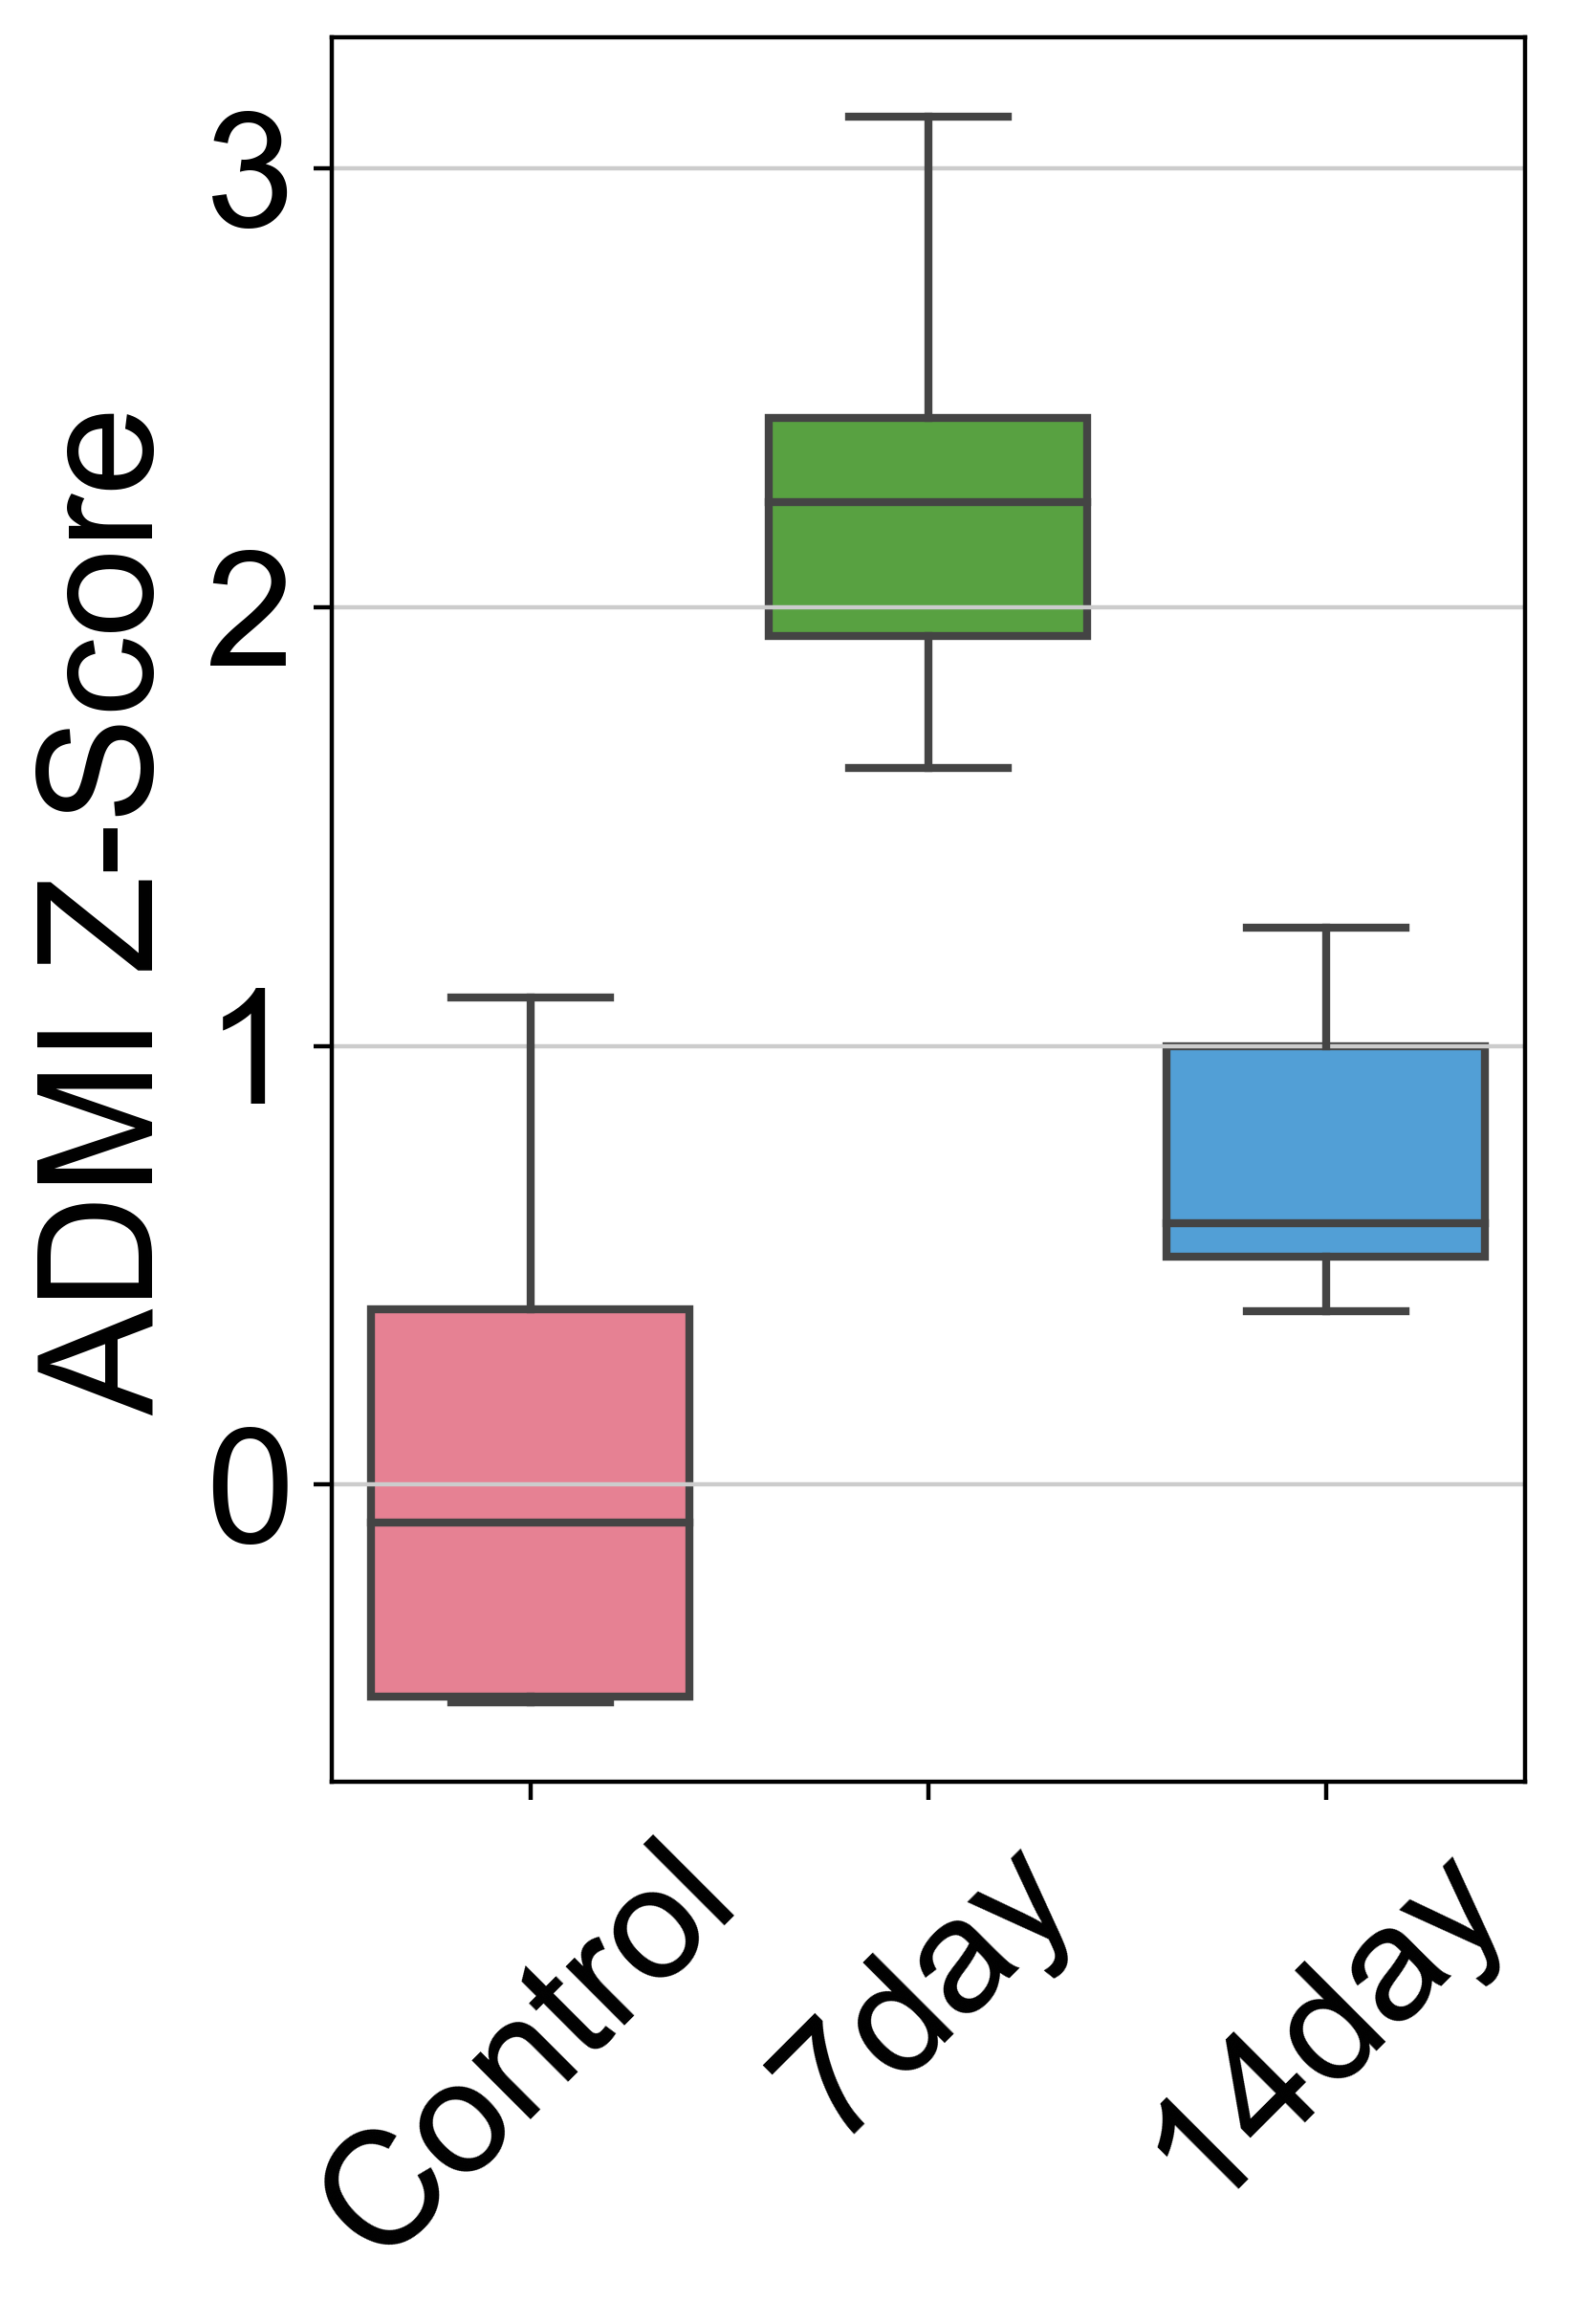

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

var = "Timepoint"

# set the figure size
fig, ax = plt.subplots(figsize=(4, 6))

# get the number of unique treatment groups
num_treatment_groups = merged_df[var].nunique()

# create a custom color palette with enough colors for all treatment groups
custom_palette = sns.color_palette("husl", num_treatment_groups)

# create the boxplot using Seaborn with the custom color palette
sns.boxplot(x=var, y='scores', data=merged_df, showfliers=False, showmeans=False, ax=ax, palette=custom_palette)

# set the title and axis labels
#ax.set_xlabel(var, fontsize=30)
ax.set_ylabel('ADMI Z-Score', fontsize=30)

# increase the size of the x and y tick labels
ax.tick_params(axis='both', labelsize=30)
ax.set_xlabel('')
plt.xticks(rotation=45)

# remove the vertical grid lines
ax.grid(axis='x', linewidth=0)


# show the plot
plt.show()
